In [2]:
import os
import librosa
import numpy as np

In [3]:
import cv2

In [4]:
import moviepy.editor as mp
from moviepy.editor import *

In [5]:
videoclip = VideoFileClip("./간접적경험.mp4")
audioclip = videoclip.audio

In [6]:
frames = int(videoclip.fps * videoclip.duration)
print(frames)

2485


In [7]:
capture = cv2.VideoCapture("./간접적경험.mp4")

In [8]:
capture.get(cv2.CAP_PROP_FRAME_COUNT)

2485.0

In [9]:
total_frame = capture.get(cv2.CAP_PROP_FRAME_COUNT)

In [10]:
print(total_frame)

2485.0


In [11]:
print(videoclip.duration)

82.93


In [12]:
audioclip

In [14]:
videoclip.audio.write_audiofile("audio.wav")

chunk:   0%|                                                                        | 0/1829 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audio.wav



chunk:   1%|▊                                                              | 25/1829 [00:11<02:46, 10.82it/s, now=None]

MoviePy - Done.


In [16]:
pwd

'C:\\Users\\comso\\Desktop\\Tutorial'

In [17]:
pathAudio = "./"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for y in files: 
    data, sr = librosa.load(y, sr = 16000,mono = True)   
    #data = data[0]
    wav_length = len(data) / sr
    
print(wav_length)
print(pathAudio)
print(files)

82.93
./
['C:\\Users\\comso\\Desktop\\Tutorial\\audio.wav']


In [18]:
print(data) #시간에 대한 진폭

[-0.03461198 -0.02907143  0.02700603 ... -0.00317298 -0.00019651
 -0.00878753]


In [19]:
fft_result = np.fft.fft(data)

In [20]:
print(fft_result) #진동수에 대한 진폭

[29.45225786+2.30926389e-14j 33.37309637+3.27052913e+01j
 27.36531471+3.28011627e+01j ... 26.63247479-7.55627693e+01j
 27.36531471-3.28011627e+01j 33.37309637-3.27052913e+01j]


In [21]:
print(fft_result.shape)

(1326880,)


In [22]:
print(data.shape)

(1326880,)


In [23]:
print(sr)

16000


In [24]:
import librosa.display

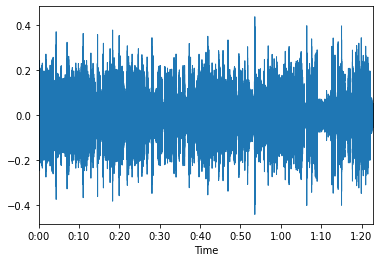

In [25]:
librosa.display.waveplot(data, sr)

In [26]:
spectrum = np.abs(fft_result)
f = np.linspace(0, sr, len(spectrum))

left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

In [27]:
print(spectrum)

[29.45225786 46.72686209 42.71740538 ... 80.11879191 42.71740538
 46.72686209]


In [28]:
print(f)

[0.00000000e+00 1.20583716e-02 2.41167431e-02 ... 1.59999759e+04
 1.59999879e+04 1.60000000e+04]


In [29]:
print(left_spectrum)

[2.94522579e+01 4.67268621e+01 4.27174054e+01 ... 7.23038753e-03
 1.53819162e-02 1.10311787e-02]


In [30]:
print(left_f)

[0.00000000e+00 1.20583716e-02 2.41167431e-02 ... 7.99996985e+03
 7.99998191e+03 7.99999397e+03]


In [31]:
import matplotlib.pyplot as plt

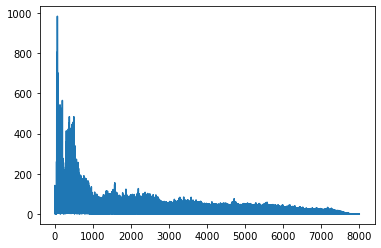

In [32]:
plt.figure()
plt.plot(left_f, left_spectrum)

In [33]:
n_fft = int(np.ceil(0.025 * sr))

In [34]:
print(n_fft)

400


In [35]:
win_length = int(np.ceil(0.025 * sr))

In [36]:
hop_length = int(np.ceil(0.01 * sr))

In [37]:
print(n_fft, win_length, hop_length)

400 400 160


In [38]:
n_mels = 80